# Imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Linear Logistic Regression

## Load dataset

In [5]:
df = pd.read_csv('data/exam.csv')
df.head(10)

,study_hours,pass_fail
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0
5,1.75,0
6,1.75,1
7,2.00,0
8,2.25,1
9,2.50,0


In [6]:
df.shape

(20, 2)

In [7]:
X = df[['study_hours']].values
y = df[['pass_fail']].values
X.shape, y.shape

((20, 1), (20, 1))

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((16, 1), (4, 1), (16, 1), (4, 1))

# Logistic Regression (from scratch)

### Logistic Regression Model

In [10]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [11]:
def logistic_regression(x, w):
    y_hat = sigmoid(x @ w)
    return y_hat

### Binary Cross Entropy

In [12]:
def bce(y, y_hat):
    loss = -(np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)))
    return loss

### Gradient

In [13]:
def gradient(x, y, y_hat):
    grads = (x.T @ (y_hat - y)) / len(y)
    return grads

### Gradient Descent

In [14]:
def gradient_descent(w, eta, grads):
    w -= eta * grads
    return w

### Accuracy

In [15]:
def accuracy(y, y_hat):
    acc = np.sum(y == np.round(y_hat)) / len(y)
    return acc

# Train

In [16]:
x_train = np.hstack((np.ones((len(x_train), 1)), x_train))
x_train.shape

(16, 2)

In [17]:
m = 1
w = np.random.randn(m + 1, 1)
eta = 0.01
n_epochs = 2000
w.shape

(2, 1)

In [18]:
loss_hist = []

for epoch in range(n_epochs):
    
    y_hat = logistic_regression(x_train, w)

    loss = bce(y_train, y_hat)
    loss_hist.append(loss)
    
    grads = gradient(x_train, y_train, y_hat)
    
    w = gradient_descent(w, eta, grads)
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch = {epoch}, \t Loss = {loss: .4}')

Epoch = 99, 	 Loss =  0.6254
Epoch = 199, 	 Loss =  0.5779
Epoch = 299, 	 Loss =  0.5658
Epoch = 399, 	 Loss =  0.5549
Epoch = 499, 	 Loss =  0.5448
Epoch = 599, 	 Loss =  0.5355
Epoch = 699, 	 Loss =  0.5268
Epoch = 799, 	 Loss =  0.5188
Epoch = 899, 	 Loss =  0.5113
Epoch = 999, 	 Loss =  0.5044
Epoch = 1099, 	 Loss =  0.498
Epoch = 1199, 	 Loss =  0.492
Epoch = 1299, 	 Loss =  0.4864
Epoch = 1399, 	 Loss =  0.4812
Epoch = 1499, 	 Loss =  0.4763
Epoch = 1599, 	 Loss =  0.4717
Epoch = 1699, 	 Loss =  0.4675
Epoch = 1799, 	 Loss =  0.4635
Epoch = 1899, 	 Loss =  0.4597
Epoch = 1999, 	 Loss =  0.4562


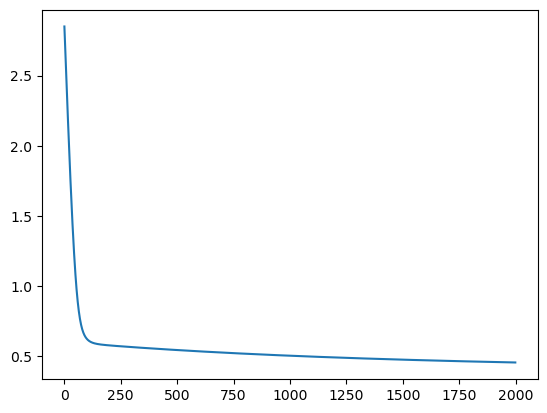

In [19]:
plt.plot(loss_hist)

# Evaluation

In [20]:
x_test = np.hstack((np.ones((len(x_test), 1)), x_test))
x_test.shape

(4, 2)

In [21]:
y_hat = logistic_regression(x_test, w)

In [22]:
accuracy(y_test, y_hat)

0.75

# Linear Logistic Regression (sklearn)

In [48]:
from sklearn.datasets import load_breast_cancer, make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier

## Load dataset

In [44]:
X, y = load_breast_cancer(return_X_y = True)
X.shape, y.shape

((569, 30), (569,))

In [46]:
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1,
                           class_sep=2.0, n_classes=2, random_state=27)
X.shape, y.shape

((1000, 2), (1000,))

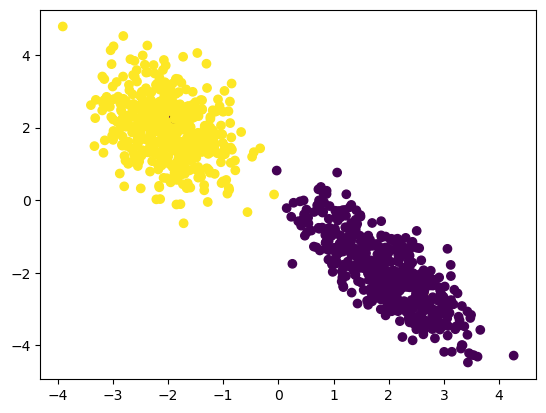

In [47]:
plt.scatter(X[:, 0], X[:, 1], c=y)

## Model

In [50]:
model = LogisticRegression(max_iter=1000, random_state=14, solver='sag')

In [51]:
model.fit(x_train, y_train)

D:\anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000, random_state=14, solver='sag')

In [52]:
model.predict(x_test)

array([1, 0, 1, 0], dtype=int64)

In [53]:
y_test

array([[1],
       [0],
       [0],
       [0]], dtype=int64)

In [79]:
model.score(x_train, y_train)

0.99375

In [80]:
model.score(x_test, y_test)

1.0

-3.9069536804425318 -4.475450367063184 4.264490328418643 4.790798302910028
(500, 500) (500, 500)


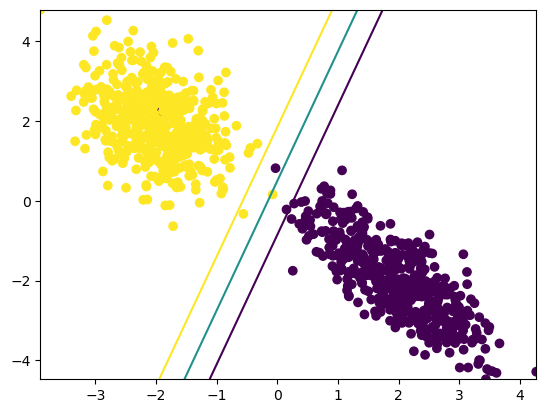

In [86]:
x1_min, x2_min = X.min(0)
x1_max, x2_max = X.max(0)

print(x1_min, x2_min, x1_max, x2_max)

n = 500
x1r = np.linspace(x1_min, x1_max, n)
x2r = np.linspace(x2_min, x2_max, n)
x1m, x2m = np.meshgrid(x1r, x2r)
print(x1m.shape, x2m.shape)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model.decision_function(Xm)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.contour(x1m, x2m, ym.reshape(x1m.shape), levels=[-1, 0, 1])

In [83]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

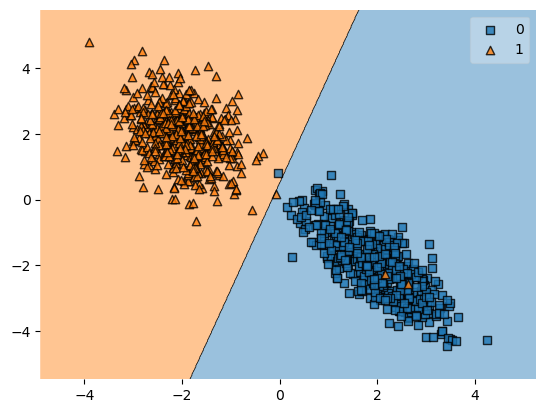

In [84]:
plot_decision_regions(X, y, clf=model)

# Non-linear Logistic Regression (sklearn)

In [54]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, SplineTransformer
from sklearn.pipeline import make_pipeline

## Load dataset

In [24]:
data = np.loadtxt('data/ex2data1.txt', delimiter=',')

In [29]:
data[0]

array([34.62365962, 78.02469282,  0.        ])

In [30]:
X = data[:, :-1].copy()
y = data[:, -1].copy().astype(np.int64)

In [32]:
X.shape, y.shape

((100, 2), (100,))

## Preprocessing

In [34]:
normz = StandardScaler()
X = normz.fit_transform(X)

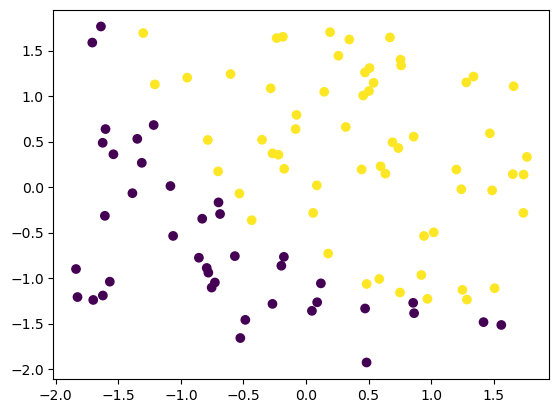

In [35]:
plt.scatter(X[:, 0], X[:, 1], c=y);

## Model

In [38]:
model = make_pipeline(PolynomialFeatures(degree=2, interaction_only=True), 
                      LogisticRegression())

In [39]:
model.fit(X, y)

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(interaction_only=True)),
                ('logisticregression', LogisticRegression())])

<Axes: >

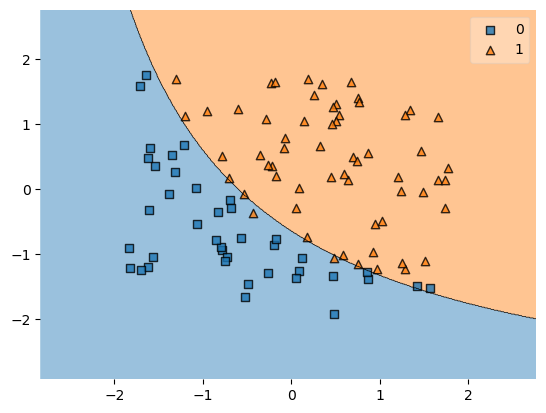

In [42]:
plot_decision_regions(X, y, clf=model)